In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
path = os.getcwd()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn

import gensim
from gensim import corpora, models
from sklearn.feature_extraction.text import CountVectorizer
 


# Latent Dirichlet Allocation

In [12]:
df = pd.read_csv(path+'/lem_clean_version_8.csv', low_memory=True)
df['statement']=df['statement'].astype(str)
df = df.astype({'Date':'datetime64', 'chair_in_charge':str, 'lemmatized':str})
df = df.drop(columns=['Unnamed: 0'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156082 entries, 0 to 156081
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              156082 non-null  int64         
 1   Date               156082 non-null  datetime64[ns]
 2   interlocutor_name  156080 non-null  object        
 3   statement _size    156082 non-null  int64         
 4   statement          156082 non-null  object        
 5   statement_number   156082 non-null  object        
 6   chair_in_charge    156082 non-null  object        
 7   score_academ       156082 non-null  float64       
 8   score_hostile      156082 non-null  float64       
 9   score_econo        156082 non-null  float64       
 10  score_virtue       156082 non-null  float64       
 11  score_vice         156082 non-null  float64       
 12  score_hawkish      156082 non-null  float64       
 13  score_posi         156082 non-null  float64 

In [163]:
import string
df1.lemmatized = df1.lemmatized.str.rstrip(string.digits)

Fonctions de visualisation de la LDA:

In [164]:
def LDA_fit(series, n_topic): #notre LDA prend en entrée le series.dataframe contenant l'information textuelle 
                                      #et le nombre de topic à modéliser
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,max_features=1000)
    tfidf = tfidf_vectorizer.fit_transform(series)

    lda = LatentDirichletAllocation(n_components=n_topic, max_iter=5,
                                  learning_method='online',
                                  learning_offset=50.,
                                  random_state=0)
    lda.fit(tfidf)
    LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=n_topic, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

    tf_feature_names = tfidf_vectorizer.get_feature_names()

    return pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vectorizer)

def LDA_on_dataset(series, n_topic): #notre LDA prend en entrée le series.dataframe contenant l'information textuelle 
                                      #et le nombre de topic à modéliser
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,max_features=1000)
    tfidf = tfidf_vectorizer.fit_transform(series)

    lda = LatentDirichletAllocation(n_components=n_topic, max_iter=5,
                                  learning_method='online',
                                  learning_offset=50.,
                                  random_state=0)
    lda.fit_transform(tfidf)
    LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=n_topic, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

    tf_feature_names = tfidf_vectorizer.get_feature_names()

    return pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vectorizer)



## Choix des documents

### Agrégation par statement
Chaque *statement* est un document : 

In [15]:
df1 = df[df.Date.dt.year==2014]
df1.head()

,index,Date,interlocutor_name,statement _size,statement,statement_number,chair_in_charge,score_academ,score_hostile,score_econo,score_virtue,score_vice,score_hawkish,score_posi,score_affi,score_uncert,lemmatized
123499,123556,2014-01-29,DUDLEY,13,thought wed couple hours laughter,statement_0,CHAIRMAN BERNANKE,0.000000,0.000000,0.000000,0.083333,0.000000,0.0,0.0,0.0,-0.0,thought wed couple hour laughter
123500,123557,2014-01-29,BERNANKE,66,thank thank much good afternoon welcome annual...,statement_1,CHAIRMAN BERNANKE,0.030303,0.030303,0.015152,0.030303,0.030303,0.0,1.0,1.0,-0.0,thank thank good afternoon welcome annual org...
123501,123558,2014-01-29,TARULLO,74,thank chairman impending change leadership pos...,statement_2,CHAIRMAN BERNANKE,0.013514,0.013514,0.040541,0.027027,0.027027,0.0,0.0,0.0,-0.0,thank chairman impending change leadership po...
123502,123559,2014-01-29,STEIN,7,would like nominate ben bernanke,statement_3,CHAIRMAN BERNANKE,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-0.0,like nominate ben bernanke
123503,123560,2014-01-29,TARULLO,4,second,statement_4,CHAIRMAN BERNANKE,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-0.0,second


In [35]:
print('Statement : \n')
pyLDAvis.enable_notebook()
LDA_fit(df1.lemmatized, 20)

Statement : 



/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
16    -0.083783 -0.036298       1        1  69.687246
14     0.175024 -0.180730       2        1   3.863602
4      0.313441 -0.014290       3        1   2.646512
3      0.140929 -0.141345       4        1   2.425210
17     0.171551  0.225172       5        1   1.726454
19    -0.001106  0.054480       6        1   1.699698
7     -0.009956  0.076373       7        1   1.685619
0      0.035388  0.212558       8        1   1.671940
1     -0.088730 -0.067584       9        1   1.542933
12     0.144564 -0.033519      10        1   1.539141
5      0.073733 -0.015194      11        1   1.340575
13    -0.088739 -0.009939      12        1   1.303359
6     -0.094099 -0.023624      13        1   1.210634
15    -0.109593 -0.003683      14        1   1.205280
2     -0.106581 -0.009276      15        1   1.160013
18    -0.093263 -0.013955      16        1   1.117926
9     -0.101021 -0.005433      17        1   1.079988
8     -0.092481 -0.005330      18        1   1.056041
10    -0.095336 -0.006392      19        1   1.038524
11    -0.089942 -0.001991      20        1   0.999304, topic_info=          Term        Freq       Total Category  logprob  loglift
896      thank  215.000000  215.000000  Default  30.0000  30.0000
653  president  189.000000  189.000000  Default  29.0000  29.0000
992        yes  101.000000  101.000000  Default  28.0000  28.0000
898      thats   89.000000   89.000000  Default  27.0000  27.0000
357   governor   85.000000   85.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
128    clearly    0.112603   10.125905  Topic20  -6.9254   0.1069
603       page    0.112382    7.610000  Topic20  -6.9274   0.3905
504       main    0.112278    6.625144  Topic20  -6.9283   0.5282
672    program    0.112278   18.133139  Topic20  -6.9283  -0.4787
375       hard    0.112265   11.934608  Topic20  -6.9284  -0.0605

[1057 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.706400  ability
0         4  0.176600  ability
5         1  0.789729  account
5         9  0.087748  account
6         1  0.593973  achieve
...     ...       ...      ...
995       1  0.578157     york
995       6  0.289079     york
997       1  0.894345    youre
997       9  0.042588    youre
999       1  0.916776     zero

[815 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 15, 5, 4, 18, 20, 8, 1, 2, 13, 6, 14, 7, 16, 3, 19, 10, 9, 11, 12])

In [59]:
series = df1.lemmatized
n_topic=20
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(series)

lda = LatentDirichletAllocation(n_components=n_topic, max_iter=5,
                              learning_method='online',
                              learning_offset=50.,
                              random_state=0)
lda.fit(tfidf)


LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=20, random_state=0)


 Nombre de topics 20 
 Nombre de mots par topic 1000


Text(33.0, 0.5, 'Mots')

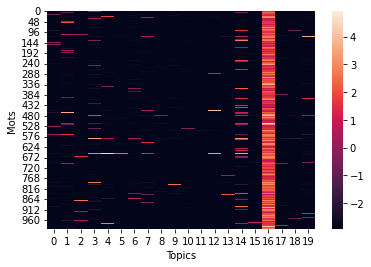

In [60]:
import seaborn as sns
print("\n Nombre de topics",np.shape(lda.components_)[0], "\n Nombre de mots par topic",np.shape(lda.components_)[1])
sns.heatmap(np.log(lda.components_.T))
plt.xlabel("Topics")
plt.ylabel("Mots")

In [80]:
lda.perplexity(tfidf)

1902.8904048387496

#### Avec Gemsim 

In [165]:
from gensim import corpora, models
from nltk import word_tokenize


In [180]:

# Use CountVectorizor to find three letter tokens, remove stop_words, 
# remove tokens that don't appear in at least 20 documents,
# remove tokens that appear in more than 20% of the documents
vect = CountVectorizer(min_df=20, max_df=0.2, stop_words='english', 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df1.lemmatized)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
 
# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
 

# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`
 
ldamodel = gensim.models.LdaMulticore(corpus=corpus, id2word=id_map, passes=2,
                                               random_state=5, num_topics=20, workers=2)


In [124]:
for idx, topic in ldamodel.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.014*"policy" + 0.010*"fund" + 0.008*"committee" + 0.008*"time" + 0.008*"risk" + 0.007*"cap" + 0.007*"percent" + 0.006*"monetary" + 0.006*"facility" + 0.006*"financial"


Topic: 1 
Words: 0.011*"policy" + 0.011*"risk" + 0.009*"inflation" + 0.008*"end" + 0.008*"thats" + 0.008*"going" + 0.007*"way" + 0.007*"percent" + 0.007*"actually" + 0.007*"change"


Topic: 2 
Words: 0.026*"inflation" + 0.018*"percent" + 0.011*"price" + 0.011*"year" + 0.010*"growth" + 0.010*"expectation" + 0.010*"unemployment" + 0.007*"risk" + 0.007*"forecast" + 0.006*"point"


Topic: 3 
Words: 0.013*"policy" + 0.013*"point" + 0.010*"percent" + 0.009*"inflation" + 0.008*"economy" + 0.008*"year" + 0.007*"going" + 0.007*"basis" + 0.007*"fund" + 0.007*"time"


Topic: 4 
Words: 0.015*"percent" + 0.015*"year" + 0.013*"growth" + 0.011*"labor" + 0.011*"inflation" + 0.010*"unemployment" + 0.009*"wage" + 0.008*"thats" + 0.007*"little" + 0.007*"point"


Topic: 5 
Words: 0.025*"inflation" + 0.015*"yes" + 0.013*

In [181]:
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.952689933633359

Coherence Score:  0.5718268011332659


### Agrégation par meeting

On agrège les statements par meeting (donc par date)

In [24]:
df2 = df.groupby('Date').apply(lambda s: ' '.join(s['lemmatized']))
df2.head()

Date
1976-08-17     ready start meeting morning item business act...
1976-09-21     meeting way good approval minute august meeti...
1976-10-19     let outset oconnell brief report unintelligib...
1976-11-16     item thought best executive session discus li...
1976-12-21     discussing legislative administrative detail ...
dtype: object

In [34]:
print('Statement : \n')
pyLDAvis.enable_notebook()
LDA_fit(df2, 20)

Statement : 



/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.026328  0.000007       1        1  94.467750
7     -0.004426 -0.000828       2        1   0.291171
11    -0.003644  0.000608       3        1   0.291171
9     -0.002147 -0.000106       4        1   0.291171
8     -0.001475  0.000908       5        1   0.291171
19    -0.001673 -0.000243       6        1   0.291171
5     -0.000051  0.000145       7        1   0.291171
2      0.001166  0.000070       8        1   0.291171
15     0.001310 -0.000022       9        1   0.291171
14     0.002461 -0.000252      10        1   0.291171
16     0.003100 -0.000653      11        1   0.291171
13     0.002272  0.000415      12        1   0.291171
1      0.003070  0.000392      13        1   0.291171
3      0.003077 -0.000505      14        1   0.291171
6      0.003035 -0.000525      15        1   0.291171
4      0.003314 -0.000352      16        1   0.291171
17     0.004192  0.000368      17        1   0.291171
0      0.003935 -0.000083      18        1   0.291171
18     0.004160  0.000102      19        1   0.291171
10     0.004654  0.000553      20        1   0.291171, topic_info=          Term       Freq      Total Category  logprob  loglift
972       weve  27.000000  27.000000  Default  30.0000  30.0000
375  greenbook  24.000000  24.000000  Default  29.0000  29.0000
905      there  21.000000  21.000000  Default  28.0000  28.0000
363        gdp  22.000000  22.000000  Default  27.0000  27.0000
404         id  19.000000  19.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
812     slight   0.018037   4.294085  Topic20  -6.7392   0.3664
114    bullard   0.018107   4.603831  Topic20  -6.7353   0.3007
816    slowing   0.018445   8.649483  Topic20  -6.7168  -0.3115
91     benefit   0.018099   7.151779  Topic20  -6.7357  -0.1402
676    project   0.017988   5.027011  Topic20  -6.7419   0.2061

[1458 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         1  0.998970      10
1         1  0.668342      12
2         1  0.676023      15
3         1  0.678229      20
4         1  0.599494    2014
...     ...       ...     ...
991       1  0.977068  yellen
992       1  0.978393     yen
997       1  1.013064   youre
998       1  0.857088   youve
999       1  0.995694    zero

[550 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 8, 12, 10, 9, 20, 6, 3, 16, 15, 17, 14, 2, 4, 7, 5, 18, 1, 19, 11])

In [188]:

# Use CountVectorizor to find three letter tokens, remove stop_words, 
# remove tokens that don't appear in at least 20 documents,
# remove tokens that appear in more than 20% of the documents
vect = CountVectorizer(min_df=20, max_df=0.2, stop_words='english', 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df2)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
 
# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
 

# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`
 
ldamodel = gensim.models.LdaMulticore(corpus=corpus, id2word=id_map, passes=2,
                                               random_state=5, num_topics=20, workers=2)


In [189]:
for idx, topic in ldamodel.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.086*"liftoff" + 0.078*"rrp" + 0.027*"tealbook" + 0.027*"ioer" + 0.019*"normalization" + 0.010*"sep" + 0.008*"kocherlakota" + 0.008*"williams" + 0.008*"quarterend" + 0.006*"simon"


Topic: 1 
Words: 0.020*"liftoff" + 0.018*"court" + 0.016*"rrp" + 0.011*"tealbook" + 0.009*"coldwell" + 0.007*"mayo" + 0.007*"normalization" + 0.005*"williams" + 0.005*"sep" + 0.005*"eastburn"


Topic: 2 
Words: 0.067*"liftoff" + 0.034*"tealbook" + 0.026*"normalization" + 0.022*"reinvestments" + 0.020*"sep" + 0.019*"reinvestment" + 0.018*"rrp" + 0.014*"williams" + 0.009*"thomas" + 0.009*"kocherlakota"


Topic: 3 
Words: 0.022*"liftoff" + 0.014*"tealbook" + 0.010*"rrp" + 0.010*"reinvestments" + 0.009*"normalization" + 0.008*"reinvestment" + 0.008*"cone" + 0.007*"sep" + 0.007*"ioer" + 0.006*"kocherlakota"


Topic: 4 
Words: 0.031*"tealbook" + 0.019*"sep" + 0.013*"liftoff" + 0.010*"voter" + 0.008*"bullard" + 0.007*"efficacy" + 0.006*"kocherlakota" + 0.006*"fan" + 0.006*"tapering" + 0.006*"lsap

In [190]:
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.643503281055234

Coherence Score:  0.7136292970376518


Ce niveau d'agrégation est moins pertinent. 

### Agrégation avec interlocuteur et date

In [36]:
df3 = df.groupby(['interlocutor_name', 'Date']).apply(lambda s: ' '.join(s['lemmatized']))

In [37]:
df3.head()

interlocutor_name  Date      
AARONSON           2008-12-16     referring exhibit follow green nonfinancial c...
AHMED              2008-12-16     referring exhibit follow blue international o...
ALEXANDER          1999-02-03     main change forecast international driven eve...
ALTMA              1979-02-06     vice chairman volcker yes president baughman ...
                   1979-03-20     secretary murray altmann assistant secretary ...
dtype: object

In [38]:
print('Statement : \n')
pyLDAvis.enable_notebook()
LDA_fit(df3, 20)

Statement : 



/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
16     0.011256  0.016796       1        1  83.938381
2     -0.020468  0.118571       2        1   7.247723
14    -0.416377 -0.007301       3        1   1.507737
7      0.016342 -0.267801       4        1   0.487439
5      0.024479  0.008611       5        1   0.426170
9      0.025498  0.008705       6        1   0.426170
1      0.025661  0.008746       7        1   0.426170
0      0.025255  0.008702       8        1   0.426170
12     0.025739  0.008751       9        1   0.426170
17     0.025739  0.008749      10        1   0.426170
15     0.025635  0.008744      11        1   0.426170
10     0.025695  0.008746      12        1   0.426170
11     0.025742  0.008753      13        1   0.426170
4      0.025629  0.008740      14        1   0.426170
19     0.025649  0.008747      15        1   0.426170
13     0.025740  0.008752      16        1   0.426170
8      0.025758  0.008753      17        1   0.426170
6      0.025677  0.008749      18        1   0.426170
3      0.025627  0.008736      19        1   0.426170
18     0.025725  0.008752      20        1   0.426170, topic_info=          Term        Freq       Total Category  logprob  loglift
993        yes  395.000000  395.000000  Default  30.0000  30.0000
120   chairman  356.000000  356.000000  Default  29.0000  29.0000
43    appendix  218.000000  218.000000  Default  28.0000  28.0000
905      thank  262.000000  262.000000  Default  27.0000  27.0000
655  president  292.000000  292.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
231     doesnt    0.377857  105.388557  Topic20  -6.9059  -0.1728
232     dollar    0.377857  196.161299  Topic20  -6.9059  -0.7941
809      shown    0.377827  103.133975  Topic20  -6.9060  -0.1513
479       left    0.377823   68.637636  Topic20  -6.9060   0.2559
453        ive    0.377803   97.761154  Topic20  -6.9061  -0.0978

[1209 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         2  0.449124      10
1         2  0.428372    2015
2         2  0.532728    2016
3         2  0.446811    2017
6         1  0.879016  abroad
...     ...       ...     ...
995       1  0.535833   yield
995       2  0.390711   yield
996       1  0.899262    york
997       1  0.920285   youre
997       2  0.011088   youre

[623 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 3, 15, 8, 6, 10, 2, 1, 13, 18, 16, 11, 12, 5, 20, 14, 9, 7, 4, 19])

In [ ]:
df3 = df1.groupby(['interlocutor_name', 'Date']).apply(lambda s: ' '.join(s['lemmatized']))
texts = []
for elem in df3:
    texts.append(word_tokenize(elem))

In [183]:

# Use CountVectorizor to find three letter tokens, remove stop_words, 
# remove tokens that don't appear in at least 20 documents,
# remove tokens that appear in more than 20% of the documents
vect = CountVectorizer(min_df=20, max_df=0.2, stop_words='english', 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df3)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
 
# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
 

# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`
 
ldamodel = gensim.models.LdaMulticore(corpus=corpus, id2word=id_map, passes=2,
                                               random_state=5, num_topics=20, workers=2)


In [186]:
for idx, topic in ldamodel.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.012*"nature" + 0.012*"emerging" + 0.011*"book" + 0.010*"macroeconomic" + 0.010*"structural" + 0.008*"exit" + 0.008*"tapering" + 0.008*"evans" + 0.008*"watching" + 0.007*"repo"


Topic: 1 
Words: 0.016*"volume" + 0.013*"euro" + 0.011*"repo" + 0.011*"dot" + 0.010*"commitment" + 0.009*"headwind" + 0.009*"february" + 0.008*"book" + 0.007*"steady" + 0.007*"ought"


Topic: 2 
Words: 0.022*"proposal" + 0.013*"hiring" + 0.013*"box" + 0.012*"mixed" + 0.011*"threshold" + 0.010*"quantitative" + 0.010*"risen" + 0.009*"vote" + 0.008*"yearend" + 0.008*"led"


Topic: 3 
Words: 0.011*"reinvestments" + 0.010*"trillion" + 0.008*"reinvestment" + 0.007*"arbitrage" + 0.007*"old" + 0.007*"equilibrium" + 0.006*"deposit" + 0.006*"taper" + 0.006*"group" + 0.006*"repo"


Topic: 4 
Words: 0.013*"yellen" + 0.012*"member" + 0.012*"page" + 0.011*"portfolio" + 0.011*"repo" + 0.010*"vote" + 0.009*"english" + 0.009*"euro" + 0.009*"powell" + 0.009*"retail"


Topic: 5 
Words: 0.013*"repo" + 0.010*"yor

In [187]:

# Compute Perplexity
print('\nPerplexity: ', model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -12.877426043506718

Coherence Score:  0.4376010032796597


### Agrégation par interlocuteur

In [39]:
df4 = df.groupby(['interlocutor_name']).apply(lambda s: ' '.join(s['lemmatized']))

In [40]:
df4.head()

interlocutor_name
AARONSON      referring exhibit follow green nonfinancial c...
AHMED         referring exhibit follow blue international o...
ALEXANDER     main change forecast international driven eve...
ALTMA         vice chairman volcker yes president baughman ...
ALTMANN       chairman  chairman  chairman  chairman  chair...
dtype: object

In [41]:
print('Statement : \n')
pyLDAvis.enable_notebook()
LDA_fit(df4, 20)

Statement : 



/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
16     0.056590 -0.000002       1        1  92.216231
2     -0.000889  0.000342       2        1   0.429706
11    -0.003237 -0.003049       3        1   0.425881
15     0.002035  0.000177       4        1   0.407540
19     0.000339  0.000092       5        1   0.407540
7     -0.001237  0.000044       6        1   0.407540
1     -0.000331 -0.000041       7        1   0.407540
9     -0.001252  0.000089       8        1   0.407540
18    -0.002394  0.000414       9        1   0.407540
17    -0.004033  0.000449      10        1   0.407540
5     -0.003550  0.000164      11        1   0.407540
0     -0.004529  0.000207      12        1   0.407540
8     -0.003338 -0.000036      13        1   0.407540
14    -0.004310  0.000181      14        1   0.407540
6     -0.003536  0.000163      15        1   0.407540
12    -0.005096  0.000107      16        1   0.407540
4     -0.004532  0.000338      17        1   0.407540
3     -0.005530  0.000231      18        1   0.407540
10    -0.005211  0.000007      19        1   0.407540
13    -0.005960  0.000121      20        1   0.407540, topic_info=          Term       Freq      Total Category  logprob  loglift
700       rate  57.000000  57.000000  Default  30.0000  30.0000
910      think  44.000000  44.000000  Default  29.0000  29.0000
435  inflation  34.000000  34.000000  Default  28.0000  28.0000
624    percent  32.000000  32.000000  Default  27.0000  27.0000
992       year  30.000000  30.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
906      thats   0.022034  16.035590  Topic20  -6.7268  -1.0872
495  longerrun   0.021468   3.308781  Topic20  -6.7528   0.4650
376       half   0.021530   6.629767  Topic20  -6.7499  -0.2271
137     coming   0.021497   5.442199  Topic20  -6.7514  -0.0312
491     little   0.021488  11.744681  Topic20  -6.7518  -0.8009

[1415 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.556105       10
1         1  0.965312     2015
2         1  0.784150     2016
3         1  0.968145     2017
4         1  0.878257  ability
...     ...       ...      ...
993       1  0.987567      yes
996       1  0.973969     york
997       1  0.999855    youre
998       1  0.904827    youve
999       1  0.937792     zero

[567 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 3, 12, 16, 20, 8, 2, 10, 19, 18, 6, 1, 9, 15, 7, 13, 5, 4, 11, 14])

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


# Computing score and novelty

In [192]:
import os

path="/Users/h2jw/Documents/GitHub/NLP-FOMC/novelty_transience_resonance/"
os.chdir(path)
from calculate_novelty_transience_resonance import *

*novelty_transience_resonance(thetas_arr, scale)* : *thetas_arr* is the document topic mixture distribution, and *scale* the window for scaling.

In [ ]:
novelty_transience_resonance(thetas_arr, scale)

In [347]:

# Use CountVectorizor to find three letter tokens, remove stop_words, 
# remove tokens that don't appear in at least 20 documents,
# remove tokens that appear in more than 20% of the documents
vect = CountVectorizer(min_df=20, max_df=0.2, stop_words='english', 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df1.lemmatized)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
 
# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
 

# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`
 
ldamodel = gensim.models.LdaMulticore(corpus=corpus, id2word=id_map, passes=2,
                                               random_state=5, num_topics=100, workers=2)


In [308]:
topic_distribution = list(ldamodel[corpus])
t1 = topic_distribution[1]
t1

[(45, 0.28109202), (75, 0.6797068)]

In [319]:
thetas_arr = [[1 for i in range(100)] for j in range(len(topic_distribution))]
for i in range(len(topic_distribution)):
    for j in range(len(topic_distribution[i])):
        index_arr = topic_distribution[i][j][0]
        #print(index_arr)
        thetas_arr[i][index_arr] = topic_distribution[i][j][1]
        
thetas_arr = np.array(thetas_arr)

In [320]:
np.shape(thetas_arr), np.mean(thetas_arr)

((3226, 100), 0.9921103184479759)

In [322]:
ntr = novelty_transience_resonance(np.array(thetas_arr), 7)
dfNTR = pd.DataFrame({'Novelty':ntr[0], 'Transience':ntr[1], 'Resonance':ntr[2]})

<>:10: DeprecationWarning: invalid escape sequence \m
<>:11: DeprecationWarning: invalid escape sequence \m
<>:23: DeprecationWarning: invalid escape sequence \m
<>:24: DeprecationWarning: invalid escape sequence \m
<>:10: DeprecationWarning: invalid escape sequence \m
<>:11: DeprecationWarning: invalid escape sequence \m
<>:23: DeprecationWarning: invalid escape sequence \m
<>:24: DeprecationWarning: invalid escape sequence \m
/var/folders/gq/5vyy06nj12q4lyz8hyd86r580000gn/T/ipykernel_35052/621226176.py:10: DeprecationWarning: invalid escape sequence \m
  plt.xlabel('Novelty $\mathcal{N}$')
/var/folders/gq/5vyy06nj12q4lyz8hyd86r580000gn/T/ipykernel_35052/621226176.py:11: DeprecationWarning: invalid escape sequence \m
  plt.ylabel('Transience $\mathcal{T}$')
/var/folders/gq/5vyy06nj12q4lyz8hyd86r580000gn/T/ipykernel_35052/621226176.py:23: DeprecationWarning: invalid escape sequence \m
  plt.xlabel('Novelty $\mathcal{N}$')
/var/folders/gq/5vyy06nj12q4lyz8hyd86r580000gn/T/ipykernel_35052

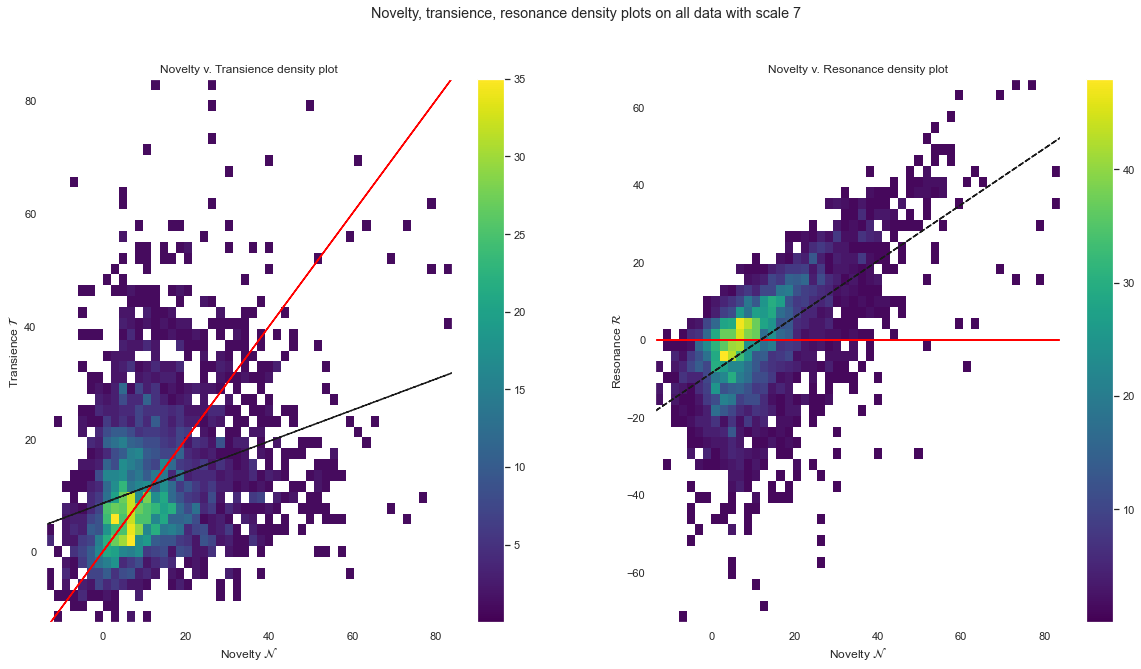

In [325]:
scale = 7
nb_topic = 100
cmap = plt.cm.get_cmap("viridis").copy()
cmap.set_under('white')
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.hist2d(dfNTR['Novelty'], dfNTR['Transience'], bins=(50, 50), cmap=cmap, vmin=0.0001)
plt.colorbar()
plt.plot(dfNTR['Novelty'],dfNTR['Novelty'], color='red')
plt.xlabel('Novelty $\mathcal{N}$')
plt.ylabel('Transience $\mathcal{T}$')
plt.title('Novelty v. Transience density plot')
m, b = np.polyfit(dfNTR['Novelty'], dfNTR['Transience'], 1)
plt.plot(dfNTR['Novelty'],m*dfNTR['Novelty']+b, '--k' )


plt.subplot(122)
plt.hist2d(dfNTR['Novelty'], dfNTR['Resonance'], bins=(50, 50), cmap=cmap, vmin=0.0001)
plt.colorbar() 
plt.plot(dfNTR['Novelty'],np.zeros(len(dfNTR['Novelty'])), color='red')
m, b = np.polyfit(dfNTR['Novelty'], dfNTR['Resonance'], 1)
plt.plot(dfNTR['Novelty'],m*dfNTR['Novelty']+b, '--k' )
plt.xlabel('Novelty $\mathcal{N}$')
plt.ylabel('Resonance $\mathcal{R}$')
plt.title('Novelty v. Resonance density plot')

plt.suptitle(f"Novelty, transience, resonance density plots on all data with scale {scale}")
plt.savefig(f'all_data_{nb_topic}_{scale}.png')

In [336]:
interloc_list = pd.unique(df.interlocutor_name)
chair_list = pd.unique(df.chair_in_charge)

In [342]:
def plot_ntr_select(select_topic_distribution):
    thetas_arr = [[1 for i in range(100)] for j in range(len(select_topic_distribution))]
    for i in range(len(select_topic_distribution)):
        for j in range(len(select_topic_distribution[i])):
            index_arr = select_topic_distribution[i][j][0]
            #print(index_arr)
            thetas_arr[i][index_arr] = select_topic_distribution[i][j][1]

    thetas_arr = np.array(thetas_arr)

    ntr = novelty_transience_resonance(np.array(thetas_arr), 7)
    dfNTR = pd.DataFrame({'Novelty':ntr[0], 'Transience':ntr[1], 'Resonance':ntr[2]})

    scale = 7
    nb_topic = 100
    cmap = plt.cm.get_cmap("viridis").copy()
    cmap.set_under('white')
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    plt.hist2d(dfNTR['Novelty'], dfNTR['Transience'], bins=(50, 50), cmap=cmap, vmin=0.0001)
    plt.colorbar()
    plt.plot(dfNTR['Novelty'],dfNTR['Novelty'], color='red')
    plt.xlabel('Novelty $\mathcal{N}$')
    plt.ylabel('Transience $\mathcal{T}$')
    plt.title('Novelty v. Transience density plot')
    m, b = np.polyfit(dfNTR['Novelty'], dfNTR['Transience'], 1)
    plt.plot(dfNTR['Novelty'],m*dfNTR['Novelty']+b, '--k' )


    plt.subplot(122)
    plt.hist2d(dfNTR['Novelty'], dfNTR['Resonance'], bins=(50, 50), cmap=cmap, vmin=0.0001)
    plt.colorbar() 
    plt.plot(dfNTR['Novelty'],np.zeros(len(dfNTR['Novelty'])), color='red')
    m, b = np.polyfit(dfNTR['Novelty'], dfNTR['Resonance'], 1)
    plt.plot(dfNTR['Novelty'],m*dfNTR['Novelty']+b, '--k' )
    plt.xlabel('Novelty $\mathcal{N}$')
    plt.ylabel('Resonance $\mathcal{R}$')
    plt.title('Novelty v. Resonance density plot')

    #plt.suptitle(f"Novelty, transience, resonance density plots on all data with scale {scale}")
    #plt.savefig(f'all_data_{nb_topic}_{scale}.png')
    return thetas_arr

<>:23: DeprecationWarning: invalid escape sequence \m
<>:24: DeprecationWarning: invalid escape sequence \m
<>:36: DeprecationWarning: invalid escape sequence \m
<>:37: DeprecationWarning: invalid escape sequence \m
<>:23: DeprecationWarning: invalid escape sequence \m
<>:24: DeprecationWarning: invalid escape sequence \m
<>:36: DeprecationWarning: invalid escape sequence \m
<>:37: DeprecationWarning: invalid escape sequence \m
/var/folders/gq/5vyy06nj12q4lyz8hyd86r580000gn/T/ipykernel_35052/2238446455.py:23: DeprecationWarning: invalid escape sequence \m
  plt.xlabel('Novelty $\mathcal{N}$')
/var/folders/gq/5vyy06nj12q4lyz8hyd86r580000gn/T/ipykernel_35052/2238446455.py:24: DeprecationWarning: invalid escape sequence \m
  plt.ylabel('Transience $\mathcal{T}$')
/var/folders/gq/5vyy06nj12q4lyz8hyd86r580000gn/T/ipykernel_35052/2238446455.py:36: DeprecationWarning: invalid escape sequence \m
  plt.xlabel('Novelty $\mathcal{N}$')
/var/folders/gq/5vyy06nj12q4lyz8hyd86r580000gn/T/ipykernel_35

### PAR CHAIR

In [348]:
df_select = df[df.chair_in_charge=='CHAIR YELLEN']
#transform
X = vect.transform(df_select.lemmatized)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
td2 = list(ldamodel[corpus])

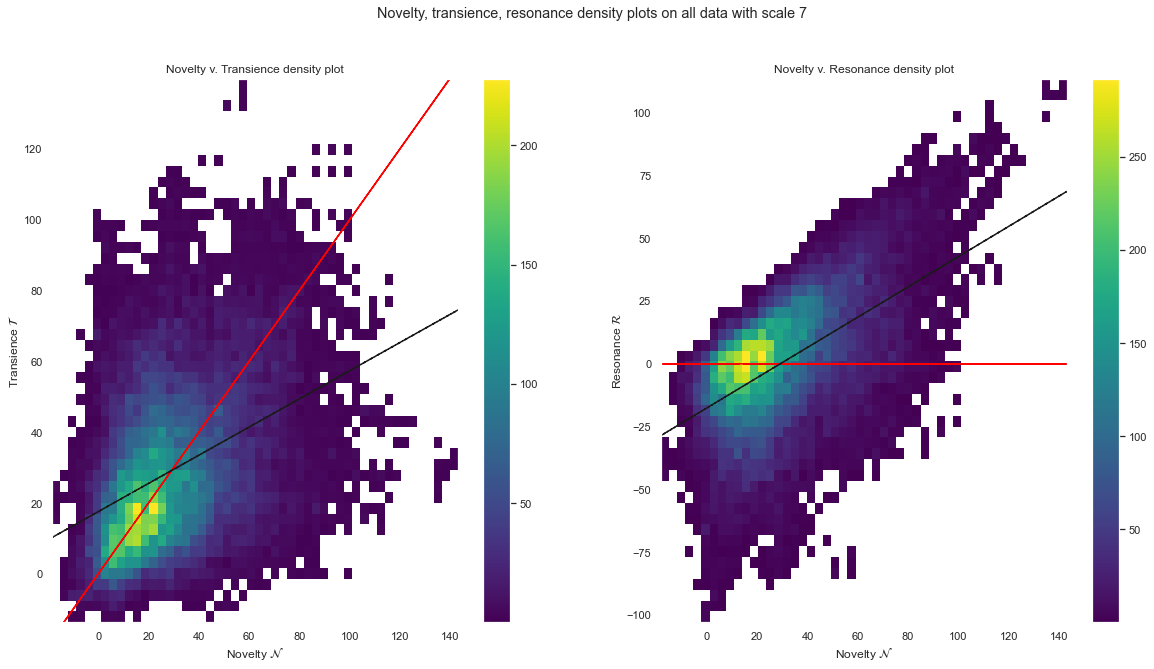

In [350]:
tarr2 = plot_ntr_select(td2)

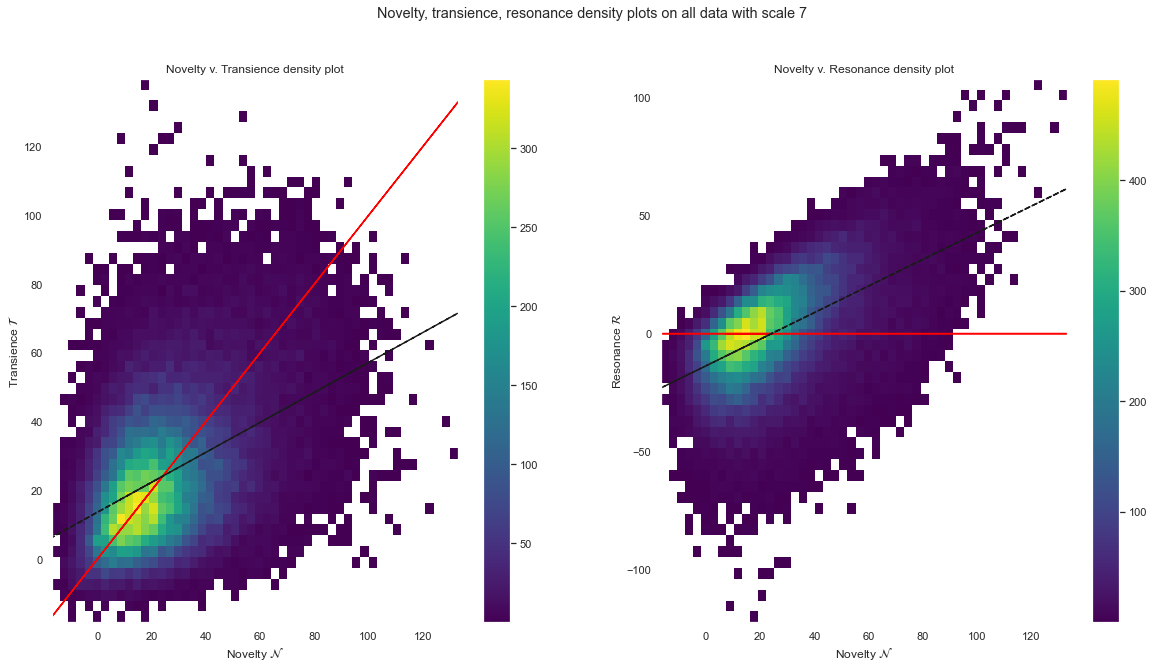

In [378]:
df_select = df[df.chair_in_charge=='CHAIRMAN GREENSPAN']
#transform
X = vect.transform(df_select.lemmatized)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
td2 = list(ldamodel[corpus])
t = plot_ntr_select(td2)

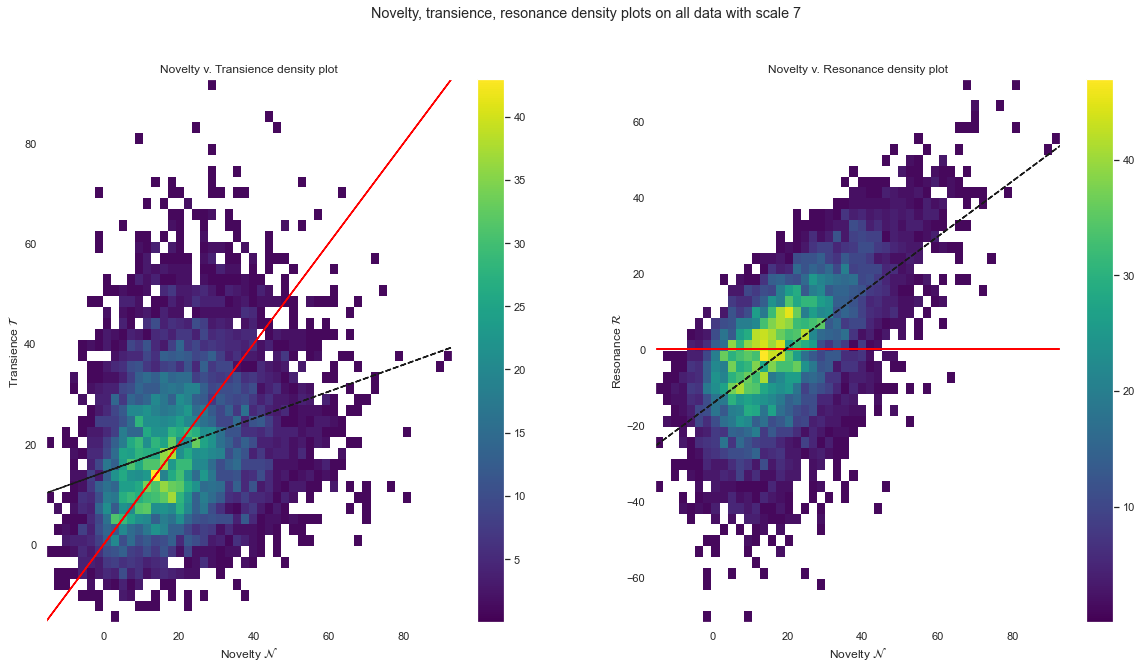

In [379]:
df_select = df[df.chair_in_charge=='CHAIRMAN MILLER']
#transform
X = vect.transform(df_select.lemmatized)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
td2 = list(ldamodel[corpus])
t = plot_ntr_select(td2)

### PER INTERLOCUTOR

In [353]:
df_select = df[df.interlocutor_name=='CHAIR YELLEN']
#transform
X = vect.transform(df_select.lemmatized)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
td2 = list(ldamodel[corpus])

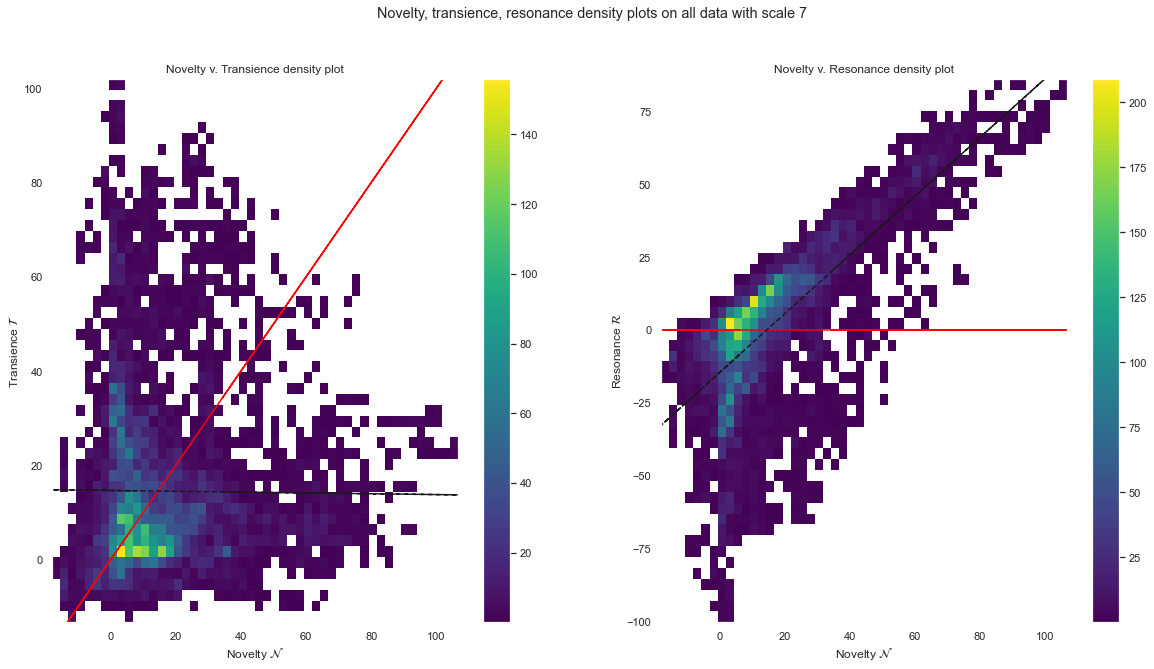

In [355]:
t = plot_ntr_select(td2)

In [368]:
df_select = df[df.interlocutor_name=='BURNS']
#transform
X = vect.transform(df_select.lemmatized)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
td2 = list(ldamodel[corpus])

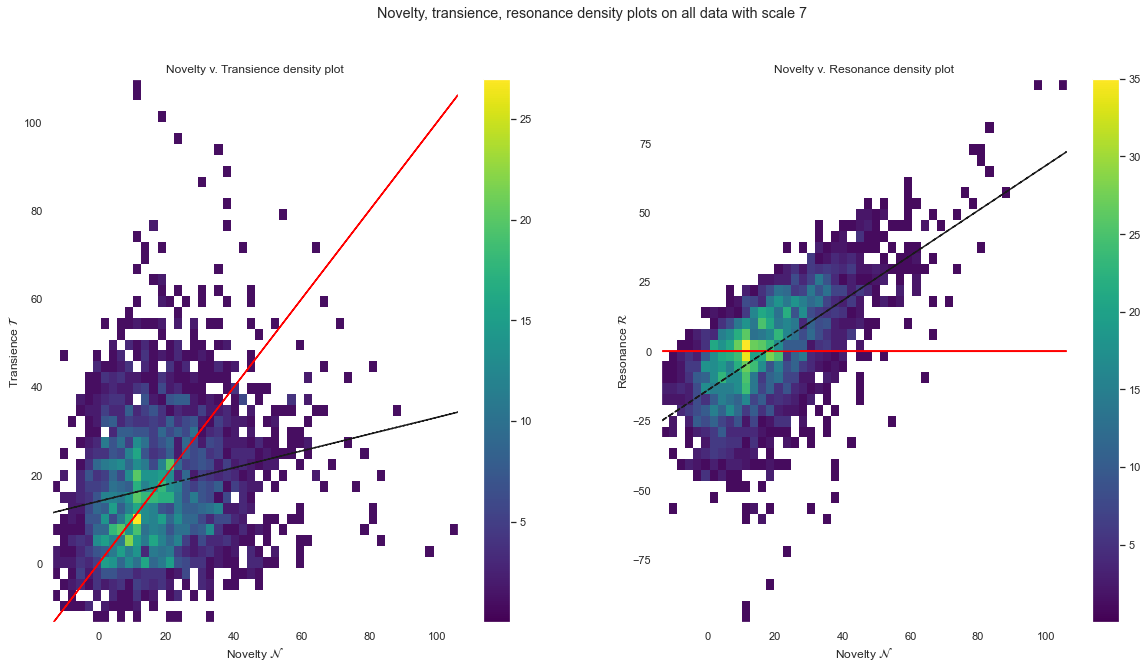

In [369]:
t = plot_ntr_select(td2)

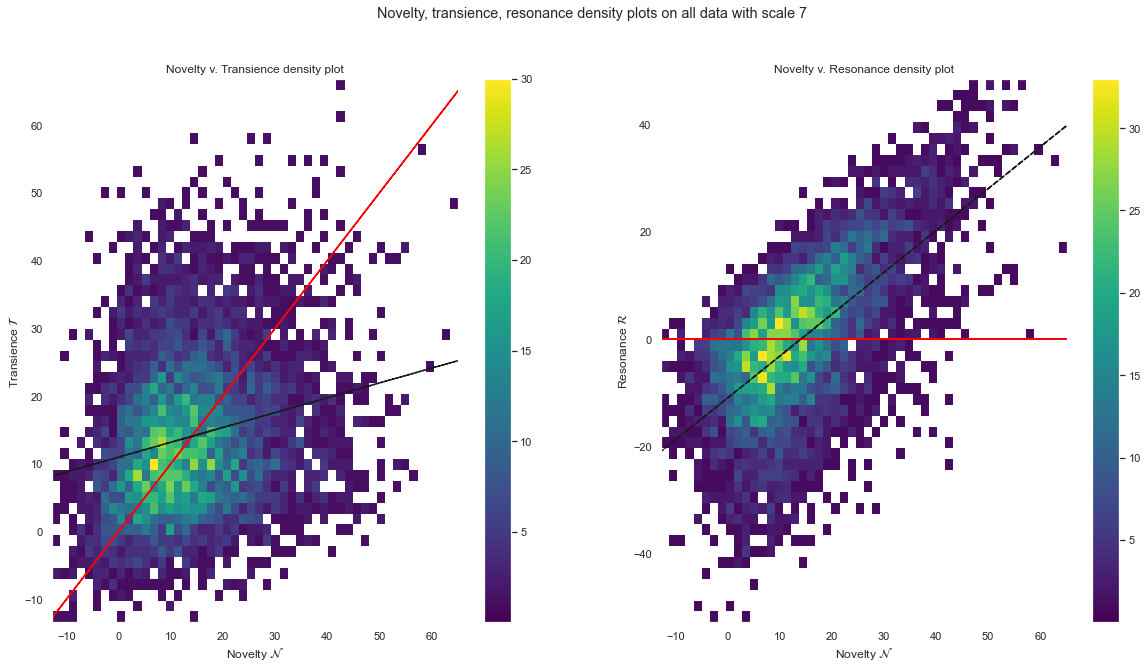

In [380]:
#

#pd.unique(df.interlocutor_name)

df_select = df[df.interlocutor_name=='PARTEE']
#transform
X = vect.transform(df_select.lemmatized)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
td2 = list(ldamodel[corpus])
t = plot_ntr_select(td2)

In [387]:
df_interloc = pd.DataFrame({'name':interloc_list})

In [398]:
n_mean, n_std, t_mean, t_std, r_mean, r_std = [],[],[],[],[],[]
for name in interloc_list :
    df_select = df[df.interlocutor_name==name]
    #transform
    X = vect.transform(df_select.lemmatized)

    # Convert sparse matrix to gensim corpus.
    corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
    td2 = list(ldamodel[corpus])
    
    thetas_arr = [[1 for i in range(100)] for j in range(len(td2))]
    for i in range(len(td2)):
        for j in range(len(td2[i])):
            index_arr = td2[i][j][0]
            #print(index_arr)
            thetas_arr[i][index_arr] = td2[i][j][1]

    thetas_arr = np.array(thetas_arr)
    
    ntr = novelty_transience_resonance(np.array(thetas_arr), 7)
    n_mean.append(np.mean(ntr[0]))
    n_std.append(np.std(ntr[0]))
    t_mean.append(np.mean(ntr[1]))
    t_std.append(np.std(ntr[1]))
    r_mean.append(np.mean(ntr[2]))
    r_std.append(np.std(ntr[2]))

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [402]:
df_interloc['novelty_mean']=n_mean
df_interloc['transience_mean']=t_mean
df_interloc['resonance_mean']=r_mean

In [403]:
df_interloc['novelty_std']=n_std
df_interloc['transience_std']=t_std
df_interloc['resonance_std']=r_std

In [410]:
df_interloc = df_interloc.dropna()

In [426]:
#df_interloc.to_csv('interlocutor_score_ntr.csv')
df_interloc = df_interloc.set_index('name')

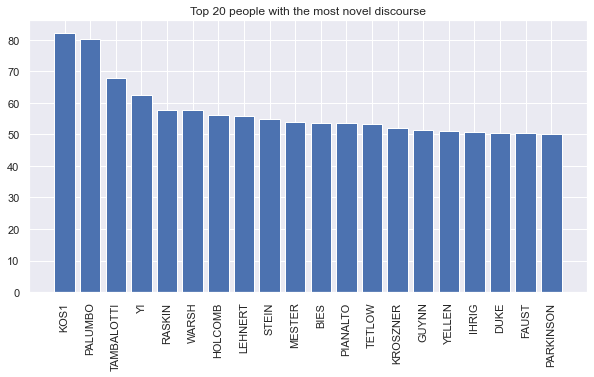

In [446]:
plt.figure(figsize=(10,5))
plt.bar(df_interloc.sort_values(by='novelty_mean', ascending=False).index[:20], df_interloc.sort_values(by='novelty_mean', ascending=False)['novelty_mean'][:20])
plt.xticks(rotation=90)  
plt.title("Top 20 people with the most novel discourse")
plt.show()                                                                                                                                       
                                                                                                                                           



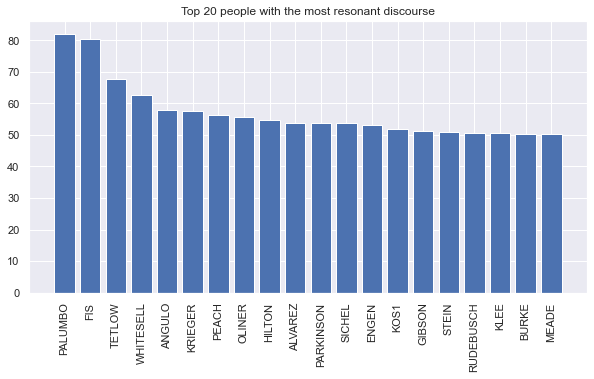

In [448]:
plt.figure(figsize=(10,5))
plt.bar(df_interloc.sort_values(by='resonance_mean', ascending=False).index[:20], df_interloc.sort_values(by='novelty_mean', ascending=False)['novelty_mean'][:20])
plt.xticks(rotation=90)  
plt.title("Top 20 people with the most resonant discourse")
plt.show()                                                                                                                                       
            